# RNN 이용하여 MINST 분류하기
+ 본과정에서는 RNN(Recurrent neural network) 이용해서 손글씨 MNIST를 분류하는 실습 수행
+ 이미지 분류한다고 하면 CNN 만 사용하는것이 아니라 RNN을 사용할수 있다는 것을 확인해 보겠습니다.

### 학습목차
1. Import modules
2. 데이터 불러오기 : Keras Dataset MNIST 활용
3. RNN 모델 구성
4. 모델 Compile : model.compile , Simple RNN 레이어 가중치 확인
5. 학습 수행 : model.fit , EarlyStopping , ModelCheckpoint
6. 학습 결과 테스트 : model.evaluate
7. 성능 그래프
8. 설젠 테스트 : 손글씨 입력해서 분류 잘하는지 보기

## 1. Import modules

In [ ]:
import tensorflow as tf
import numpy as np

## 2. 데이터 불러오기

In [ ]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# 3차원 배열
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
y_train.shape, y_test.shape

((60000,), (10000,))

## 3. RNN 모델 구성

#### ㅇ RNN 입력 구조 : 3차원 : Batch * 문장의 각단어 * 임베딩크기

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, SimpleRNN

In [ ]:
# 28 X 28 shape --> 28 X 28  shape 변경 : 하지만 변경없음

x_train = x_train.reshape(x_train.shape[0], 28, 28)
x_test = x_test.reshape(x_test.shape[0], 28, 28)
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
# model is RNN with 256 units, input is 28-dim vector 28 timesteps

model = Sequential()
model.add(SimpleRNN(units=256, return_sequences=True, input_shape=(28,28)))
model.add(Dropout(0.3))
model.add(SimpleRNN(units=256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))

## 4. 모델 Compile

In [ ]:
# Y 레이블에 대해 원핫인코딩 수행
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [ ]:
y_train.shape, y_test.shape

((60000, 10), (10000, 10))

In [ ]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 28, 256)           72960     
                                                                 
 dropout (Dropout)           (None, 28, 256)           0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense (Dense)               (None, 10)                2570      
                                                                 
Total params: 206858 (808.04 KB)
Trainable params: 206858 (808.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## 5. 학습 수행

In [ ]:
EPOCHS = 5
BATCH_SIZE = 1024

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
es = EarlyStopping(monitor='val_loss', patience=4, mode='min', verbose=1)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', save_best_only=True, verbose=1)

In [ ]:
history = model.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, callbacks=[es, mc], validation_data=(x_test, y_test))

Epoch 1/5
59/59 [==============================] - ETA: 0s - loss: 0.5863 - accuracy: 0.8083
Epoch 1: val_accuracy improved from -inf to 0.94410, saving model to best_model.h5
59/59 [==============================] - 12s 67ms/step - loss: 0.5863 - accuracy: 0.8083 - val_loss: 0.1823 - val_accuracy: 0.9441
Epoch 2/5
 2/59 [>.............................] - ETA: 3s - loss: 0.2289 - accuracy: 0.9307

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


58/59 [============================>.] - ETA: 0s - loss: 0.1907 - accuracy: 0.9422
Epoch 2: val_accuracy improved from 0.94410 to 0.96280, saving model to best_model.h5
59/59 [==============================] - 3s 50ms/step - loss: 0.1910 - accuracy: 0.9421 - val_loss: 0.1200 - val_accuracy: 0.9628
Epoch 3/5
59/59 [==============================] - ETA: 0s - loss: 0.1336 - accuracy: 0.9598
Epoch 3: val_accuracy improved from 0.96280 to 0.96750, saving model to best_model.h5
59/59 [==============================] - 3s 53ms/step - loss: 0.1336 - accuracy: 0.9598 - val_loss: 0.1022 - val_accuracy: 0.9675
Epoch 4/5
59/59 [==============================] - ETA: 0s - loss: 0.1118 - accuracy: 0.9660
Epoch 4: val_accuracy improved from 0.96750 to 0.97190, saving model to best_model.h5
59/59 [==============================] - 5s 84ms/step - loss: 0.1118 - accuracy: 0.9660 - val_loss: 0.0852 - val_accuracy: 0.9719
Epoch 5/5
58/59 [============================>.] - ETA: 0s - loss: 0.0943 - accurac

## 6. 학습 결과 테스트

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.0702 - accuracy: 0.9785


[0.0701630562543869, 0.9785000085830688]

## 7. 성능 그래프

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
x_range = range(1,len(history.history['accuracy'])+1)

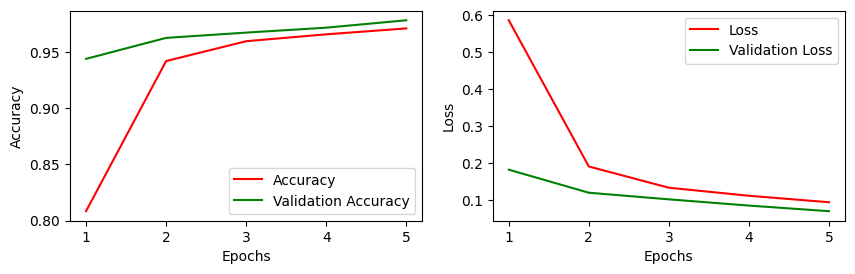

In [ ]:
plt.figure(figsize=(10,6))
plt.subplot(221)
plt.plot(x_range, history.history['accuracy'], color='red', label='Accuracy')
plt.plot(x_range, history.history['val_accuracy'], color='green', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(222)
plt.plot(x_range, history.history['loss'], color='red', label='Loss')
plt.plot(x_range, history.history['val_loss'], color='green', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

## 8. 실전 테스트

In [ ]:
x_test[0].shape

(28, 28)

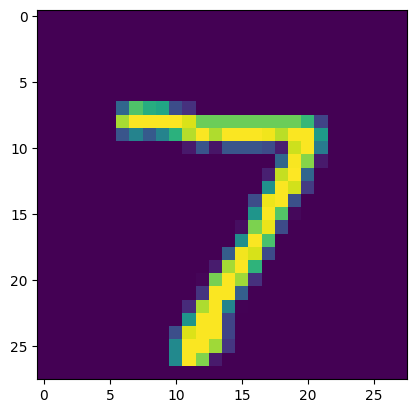

1/1 [==============================] - 0s 240ms/step
Prediction Probability:  [[2.6533280e-06 4.1050539e-06 1.9701997e-04 9.3421339e-05 5.9227011e-07
  3.2023118e-07 4.2887873e-08 9.9960250e-01 1.1610429e-06 9.8271506e-05]]
The Answer is  [7]


In [ ]:
n = 0
plt.imshow(x_test[n].reshape(28,28))
plt.show()

pred = model.predict(x_test[n].reshape(1,28,28))
answer = np.argmax(pred, axis=-1)

print('Prediction Probability: ', pred)
print('The Answer is ', answer)

## 배운 내용 정리
1. Keras 손글씨 MNIST Dataset 활용
2. 이미지 데이터에 대해 RNN 모델 만들어 분류 실습
3. 이미지 분류시 CNN 모델을 많이 사용하고 높은 성능을 발휘 하지만, FCNN, RNN도 이미지 데이터 분류에 활용될수 있음을 확인